### Тема проекта: 
Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Цель проекта: 
Cкорректировать рекламный бюджет и понять, какой тариф приносит больше денег.

### Описание данных
Даны данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана
    
    
Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
    
    
Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение
    
    
Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя
    
    
Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### План
1. Смотрим датасеты ищем ошибки и дубликаты


2. Посчитать для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя 

3. Анализ данных:

    Описать поведение клиентов оператора, исходя из выборки. 
    Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. 
    Постройте гистограммы. 
    Опишите распределения.
    
4. Проверить гипотезы:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных из файла

### Предобработка данных
- Проверить типы данных
- Изучить пропуски в датафрейме
- Изучить дубликаты в датафрейме


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st


In [2]:
calls = pd.read_csv('/datasets/calls.csv') 
display(calls.head(20))
calls.info()

calls['call_date'] = pd.to_datetime(calls['call_date'])  # переводим в дату
calls['duration']= np.ceil(calls['duration']) # округляем
display(calls.head(20))
calls.info()

duplicated_calls = calls[calls.duplicated(keep=False)].head(30)
#проверяем на дубликаты дубликатов не обнаруженно

display(duplicated_calls) 
display(duplicated_calls.duplicated().sum())


round((calls.isna().mean()*100),2)
round((calls.isnull().mean()*100),2)
#проверить на isna() или isnull()




,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000
9,1000_9,2018-08-15,0.0,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id


0

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [3]:
internet = pd.read_csv('/datasets/internet.csv') 
display(internet.head(20))
internet.info()
internet['session_date'] = pd.to_datetime(internet['session_date'])  # переводим в дату

display(internet.head(20))
internet.info()

duplicated_internet = internet[internet.duplicated(keep=False)].head(30)
#проверяем на дубликаты дубликатов не обнаруженно
display(duplicated_internet) 
display(duplicated_internet.duplicated().sum())


round((internet.isna().mean()*100),2)
round((internet.isnull().mean()*100),2)
#проверить на isna() или isnull()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id


0

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [4]:
messages = pd.read_csv('/datasets/messages.csv') 
display(messages.head(20))
messages.info()
messages['message_date'] = pd.to_datetime(messages['message_date'])  # переводим в дату
display(messages.head(20))
messages.info()

duplicated_messages = messages[messages.duplicated(keep=False)].head(30)
#проверяем на дубликаты дубликатов не обнаруженно
display(duplicated_messages) 
display(duplicated_messages.duplicated().sum())


round((messages.isna().mean()*100),2)
round((messages.isnull().mean()*100),2)
#проверить на isna() или isnull()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id


0

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv') 
display(tariffs.head(20))
tariffs.info()
#все столбцы в нужном формате

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
users = pd.read_csv('/datasets/users.csv') 
display(users.head(20))
users.info()


users['churn_date'] = pd.to_datetime(users['churn_date'])  # переводим в дату
users['reg_date'] = pd.to_datetime(users['reg_date'])  # переводим в дату
display(users.head(20))
users.info()

duplicated_users = users[users.duplicated(keep=False)].head(30)
#проверяем на дубликаты дубликатов не обнаруженно
display(duplicated_users) 
display(duplicated_users.duplicated().sum())


round((users.isna().mean()*100),2)
round((users.isnull().mean()*100),2)
#проверить на isna() или isnull()



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


0

user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

In [7]:
display(users.query('tariff == "ultra"').count()) #итого 149 человека в выборке на тарифе ультра 
display(users.query('tariff == "smart"').count()) #итого 351 человека в выборке на тарифе смарт 

user_id       149
age           149
churn_date     15
city          149
first_name    149
last_name     149
reg_date      149
tariff        149
dtype: int64

user_id       351
age           351
churn_date     23
city          351
first_name    351
last_name     351
reg_date      351
tariff        351
dtype: int64

In [8]:
display(users['tariff'].unique())#проверим что нет по два тарифа у одного пользователя
display(users['city'].unique())#проверим написание городов

display(users.groupby(['city']).agg({'tariff': 'count'}).sort_values(by = ['city'], ascending = True).head(76))

array(['ultra', 'smart'], dtype=object)

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

,tariff
city,
Архангельск,1
Астрахань,4
Балашиха,5
Барнаул,3
Белгород,2
...,...
Челябинск,9
Череповец,3
Чита,4


In [9]:
display(users['churn_date'].max()) #т.к. пропуски это те что действовали на момент выгрузки значит заменим самой поздней датой
users['churn_date'] = users['churn_date'].fillna(users['churn_date'].max()) 

round((users.isna().mean()*100),2)
round((users.isnull().mean()*100),2)

Timestamp('2018-12-30 00:00:00')

user_id       0.0
age           0.0
churn_date    0.0
city          0.0
first_name    0.0
last_name     0.0
reg_date      0.0
tariff        0.0
dtype: float64

In [10]:
calls['month'] = calls['call_date'].dt.month 
#ВЫДЕЛИТЬ МЕСЯЦ ИЗ ДАТЫ

calls_group = calls.groupby(['month','user_id']).agg({'call_date': 'count', 'duration': 'sum'}).sort_values(by = ['user_id','month'], ascending = True)
calls_group.columns = ['calls_count', 'calls_sum']
calls_group = calls_group.reset_index() 
#display(calls_group)

#call_date — дата звонка
#duration — длительность звонка в минутах
#user_id — идентификатор пользователя, сделавшего звонок
#для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; 
#Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

#отбрасываем хвост округляем делаем целое потом считаем что любая лишняя секунда считаеться за использованную минуту
#calls_group['calls_sum2'] = calls_group['calls_sum'] -(calls_group['calls_sum'].astype('int')) 
#
#def calls_sum2_1(row):
#
 #   income = row['calls_sum2']
  #  if income <= 0:
   #     return 0  
    #if income > 0:
     #   return 1
   
        
#calls_group['calls_sum2'] = calls_group.apply(calls_sum2_1, axis=1)

#calls_group['calls_sum'] = (calls_group['calls_sum'].astype('int')) + calls_group['calls_sum2']
calls_group = calls_group.loc[:, ['month','user_id','calls_count','calls_sum']]
display(calls_group)

,month,user_id,calls_count,calls_sum
0,5,1000,22,159.0
1,6,1000,43,172.0
2,7,1000,47,340.0
3,8,1000,52,408.0
4,9,1000,58,466.0
...,...,...,...,...
3169,10,1498,41,247.0
3170,9,1499,9,70.0
3171,10,1499,68,449.0
3172,11,1499,74,612.0


In [11]:
calls_group_pivot = calls_group.pivot_table(index = 'user_id',  columns = 'month', values = 'calls_sum', aggfunc = 'sum')
display(calls_group_pivot)
#calls_group_pivot.T.plot(grid=True, figsize=(15, 10), xticks=list(calls_group_pivot.columns.values))
#plt.title('Звонки по месяцам')
#plt.ylabel('$')
#plt.xlabel('Месяца')
#plt.show()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,813.0,1030.0,954.0,1031.0
1496,48.0,594.0,557.0,521.0,484.0,555.0,582.0,527.0,486.0,450.0,662.0,518.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0,371.0,545.0


In [12]:
messages['month'] = messages['message_date'].dt.month 
#ВЫДЕЛИТЬ МЕСЯЦ ИЗ ДАТЫ

messages_group = messages.groupby(['month','user_id']).agg({'id': 'count'}).sort_values(by = ['user_id','month'], ascending = True)
messages_group.columns = ['messages_count']
messages_group = messages_group.reset_index() 
display(messages_group)

#id — уникальный номер сообщения
#message_date — дата сообщения
#user_id — идентификатор пользователя, отправившего сообщение
#для каждого пользователя: количество отправленных сообщений по месяцам; 

,month,user_id,messages_count
0,5,1000,22
1,6,1000,60
2,7,1000,75
3,8,1000,81
4,9,1000,57
...,...,...,...
2712,10,1498,42
2713,9,1499,11
2714,10,1499,48
2715,11,1499,59


In [13]:
internet['month'] = internet['session_date'].dt.month 
#ВЫДЕЛИТЬ МЕСЯЦ ИЗ ДАТЫ

internet_group = internet.groupby(['month','user_id']).agg({'mb_used': 'sum'}).sort_values(by = ['user_id','month'], ascending = True)
internet_group.columns = ['internet_sum']
internet_group = internet_group.reset_index() 
#display(internet_group)

#id — уникальный номер сессии
#mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
#session_date — дата интернет-сессии
#user_id — идентификатор пользователя
#для каждого пользователя: объем израсходованного интернет-трафика по месяцам; 
#отбрасываем хвост округляем делаем целое потом считаем что:
#Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


internet_group['internet_sum'] = internet_group['internet_sum']/1024
internet_group['internet_sum2'] = internet_group['internet_sum'] -(internet_group['internet_sum'].astype('int')) 

def internet_sum2_1(row):

    income = row['internet_sum2']
    if income <= 0:
        return 0  
    if income > 0:
        return 1
   
        
internet_group['internet_sum2'] = internet_group.apply(internet_sum2_1, axis=1)

internet_group['internet_sum'] = (internet_group['internet_sum'].astype('int')) + internet_group['internet_sum2']
internet_group = internet_group.loc[:, ['month','user_id','internet_sum']]
display(internet_group)

,month,user_id,internet_sum
0,5,1000,3
1,6,1000,23
2,7,1000,14
3,8,1000,14
4,9,1000,15
...,...,...,...
3198,10,1498,21
3199,9,1499,2
3200,10,1499,18
3201,11,1499,18


In [14]:

#display(calls_group)
calls_group_messages_group = calls_group.merge(messages_group, on=('month','user_id'), how='outer')
calls_group_messages_group_internet_group = calls_group_messages_group.merge(internet_group, on=('month','user_id'), how='outer')

#display(calls_group_messages_group_internet_group)


users_tariff = users.loc[:, ['user_id','tariff', 'city']] #оставляем только нужные столбцы
users_tariff = users_tariff.rename(columns={'tariff': 'tariff_name'}) #переименновываем столбцы для удобного мерджа
 
calls_group_messages_group_internet_group_tariff= calls_group_messages_group_internet_group.merge(users_tariff, on='user_id', how='outer')
#display(calls_group_messages_group_internet_group_tariff)
users_profil_tariff= calls_group_messages_group_internet_group_tariff.merge(tariffs, on='tariff_name', how='outer')
#display(users_profil_tariff)
display(users_profil_tariff)
users_profil_tariff = users_profil_tariff.fillna(0) #заменим НАН NAN на 0
display(users_profil_tariff)

#вычтите бесплатный лимит из суммарного количества звонков, 
users_profil_tariff['minutes_calls_sverhtarifa'] =  users_profil_tariff['calls_sum'] - users_profil_tariff['minutes_included']

#вычтите бесплатный лимит из суммарного количества сообщений 
users_profil_tariff['messages_sverhtarifa'] = users_profil_tariff['messages_count'] -  users_profil_tariff['messages_included']

#вычтите бесплатный лимит из суммарного количества интернет-трафика; все приводим к ГБ
users_profil_tariff['gb_per_month_included'] = users_profil_tariff['mb_per_month_included']/1024

users_profil_tariff['internet_sverhtarifa_gb'] =  users_profil_tariff['internet_sum'] - users_profil_tariff['gb_per_month_included']


display(users_profil_tariff)


,month,user_id,calls_count,calls_sum,messages_count,internet_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,5.0,1000,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,6.0,1000,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,7.0,1000,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,8.0,1000,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,9.0,1000,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,NaN,NaN,32.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,10.0,1489,NaN,NaN,21.0,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3213,11.0,1489,NaN,NaN,20.0,18.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3214,12.0,1489,NaN,NaN,35.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3


,month,user_id,calls_count,calls_sum,messages_count,internet_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,5.0,1000,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,6.0,1000,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,7.0,1000,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,8.0,1000,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,9.0,1000,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,0.0,0.0,32.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,10.0,1489,0.0,0.0,21.0,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3213,11.0,1489,0.0,0.0,20.0,18.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3214,12.0,1489,0.0,0.0,35.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3


,month,user_id,calls_count,calls_sum,messages_count,internet_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_calls_sverhtarifa,messages_sverhtarifa,gb_per_month_included,internet_sverhtarifa_gb
0,5.0,1000,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,30.0,-27.0
1,6.0,1000,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,30.0,-7.0
2,7.0,1000,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,30.0,-16.0
3,8.0,1000,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,30.0,-16.0
4,9.0,1000,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,30.0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,0.0,0.0,32.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-500.0,-18.0,15.0,2.0
3212,10.0,1489,0.0,0.0,21.0,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-500.0,-29.0,15.0,5.0
3213,11.0,1489,0.0,0.0,20.0,18.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-500.0,-30.0,15.0,3.0
3214,12.0,1489,0.0,0.0,35.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,-500.0,-15.0,15.0,2.0


In [15]:


def minutes_calls_sverhtarifa_1(row):

    income = row['minutes_calls_sverhtarifa']
    if income <= 0:
        return 0  
    if income > 0:
        return row['minutes_calls_sverhtarifa']
        
users_profil_tariff['minutes_calls_sverhtarifa'] = users_profil_tariff.apply(minutes_calls_sverhtarifa_1, axis=1)


def messages_sverhtarifa_1(row):

    income = row['messages_sverhtarifa']
    if income <= 0:
        return 0  
    if income > 0:
        return row['messages_sverhtarifa']
        
users_profil_tariff['messages_sverhtarifa'] = users_profil_tariff.apply(messages_sverhtarifa_1, axis=1)


def internet_sverhtarifa_gb_1(row):

    income = row['internet_sverhtarifa_gb']
    if income <= 0:
        return 0  
    if income > 0:
        return row['internet_sverhtarifa_gb']
        
users_profil_tariff['internet_sverhtarifa_gb'] = users_profil_tariff.apply(internet_sverhtarifa_gb_1, axis=1)

display(users_profil_tariff)


,month,user_id,calls_count,calls_sum,messages_count,internet_sum,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_calls_sverhtarifa,messages_sverhtarifa,gb_per_month_included,internet_sverhtarifa_gb
0,5.0,1000,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,30.0,0.0
1,6.0,1000,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,30.0,0.0
2,7.0,1000,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,30.0,0.0
3,8.0,1000,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,30.0,0.0
4,9.0,1000,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,0.0,0.0,32.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,15.0,2.0
3212,10.0,1489,0.0,0.0,21.0,20.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,15.0,5.0
3213,11.0,1489,0.0,0.0,20.0,18.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,15.0,3.0
3214,12.0,1489,0.0,0.0,35.0,17.0,smart,Санкт-Петербург,50,15360,500,550,200,3,3,0.0,0.0,15.0,2.0


In [16]:
#помесячную выручку с каждого пользователя, остаток умножьте на значение из тарифного плана; 
#прибавьте абонентскую плату, соответствующую тарифному плану.
users_profil_tariff['deneg_minutes_calls'] = users_profil_tariff['minutes_calls_sverhtarifa']*users_profil_tariff['rub_per_minute']
        
users_profil_tariff['deneg_messages'] =users_profil_tariff['messages_sverhtarifa']*users_profil_tariff['rub_per_message']
       
users_profil_tariff['deneg_internet'] =users_profil_tariff['internet_sverhtarifa_gb']*users_profil_tariff['rub_per_gb']
users_profil_tariff['deneg_sverh_tariff'] =users_profil_tariff['deneg_internet']+users_profil_tariff['deneg_messages'] + users_profil_tariff['deneg_minutes_calls']
users_profil_tariff['deneg_vsego'] =users_profil_tariff['deneg_internet']+users_profil_tariff['deneg_messages'] + users_profil_tariff['deneg_minutes_calls'] + users_profil_tariff['rub_monthly_fee']
display(users_profil_tariff)


,month,user_id,calls_count,calls_sum,messages_count,internet_sum,tariff_name,city,messages_included,mb_per_month_included,...,rub_per_minute,minutes_calls_sverhtarifa,messages_sverhtarifa,gb_per_month_included,internet_sverhtarifa_gb,deneg_minutes_calls,deneg_messages,deneg_internet,deneg_sverh_tariff,deneg_vsego
0,5.0,1000,22.0,159.0,22.0,3.0,ultra,Краснодар,1000,30720,...,1,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1950.0
1,6.0,1000,43.0,172.0,60.0,23.0,ultra,Краснодар,1000,30720,...,1,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1950.0
2,7.0,1000,47.0,340.0,75.0,14.0,ultra,Краснодар,1000,30720,...,1,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1950.0
3,8.0,1000,52.0,408.0,81.0,14.0,ultra,Краснодар,1000,30720,...,1,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1950.0
4,9.0,1000,58.0,466.0,57.0,15.0,ultra,Краснодар,1000,30720,...,1,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,9.0,1489,0.0,0.0,32.0,17.0,smart,Санкт-Петербург,50,15360,...,3,0.0,0.0,15.0,2.0,0.0,0.0,400.0,400.0,950.0
3212,10.0,1489,0.0,0.0,21.0,20.0,smart,Санкт-Петербург,50,15360,...,3,0.0,0.0,15.0,5.0,0.0,0.0,1000.0,1000.0,1550.0
3213,11.0,1489,0.0,0.0,20.0,18.0,smart,Санкт-Петербург,50,15360,...,3,0.0,0.0,15.0,3.0,0.0,0.0,600.0,600.0,1150.0
3214,12.0,1489,0.0,0.0,35.0,17.0,smart,Санкт-Петербург,50,15360,...,3,0.0,0.0,15.0,2.0,0.0,0.0,400.0,400.0,950.0


## Шаг  Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

mean                                median               \
              calls_sum internet_sum messages_count calls_sum internet_sum   
tariff_name                                                                  
smart        417.747534    16.321525      33.369058     421.5         17.0   
ultra        526.089249    19.474645      49.313387     518.0         19.0   

                            
            messages_count  
tariff_name                 
smart                 28.0  
ultra                 38.0

<AxesSubplot:>

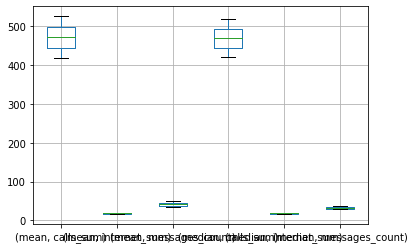

In [17]:
users_profil_ultra= users_profil_tariff.query('tariff_name == "ultra"')
users_profil_smart= users_profil_tariff.query('tariff_name == "smart"')

test = users_profil_tariff.pivot_table(index = ['tariff_name'],  values = ['calls_sum', 'messages_count', 'internet_sum'], aggfunc = ['mean','median'])
#test.columns = ['count','mean','median']
display(test)
test.boxplot()

#display(users_profil_ultra['calls_sum'].value_counts()) 

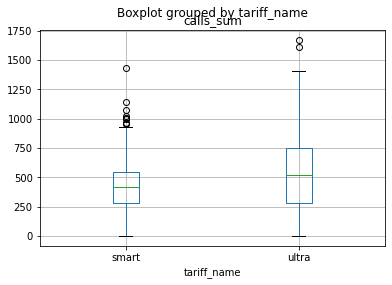

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: calls_sum, dtype: float64

In [18]:
users_profil_tariff.boxplot(by = 'tariff_name', column='calls_sum')
plt.show()

users_profil_smart['calls_sum'].describe()  


In [19]:
users_profil_ultra['calls_sum'].describe() 

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: calls_sum, dtype: float64

'Дисперсия выборки минут разговора ultra '

101052.49354928387

'Дисперсия выборки минут разговора smart'

36281.39383644458

'Стандартное отклонение выборки минут разговора ultra'

317.8875485911392

'Стандартное отклонение выборки минут разговора smart'

190.4767540579285

'Среднее минут разговора ultra'

526.0892494929006

'Медиана минут разговора ultra'

518.0

'Среднее минут разговора smart'

417.747533632287

'Медиана минут разговора smart'

421.5

'MAX минут разговора ultra'

1673.0

'MAX минут разговора smart'

1435.0

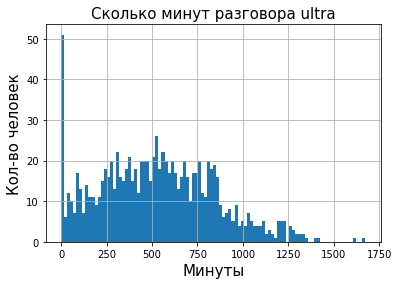

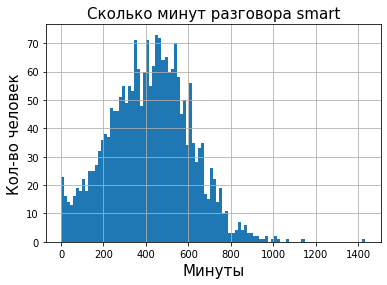

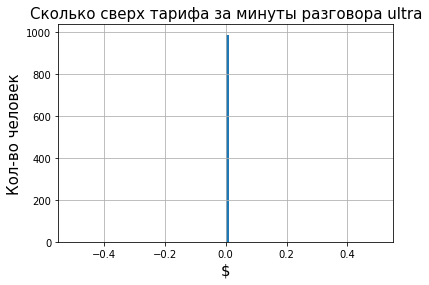

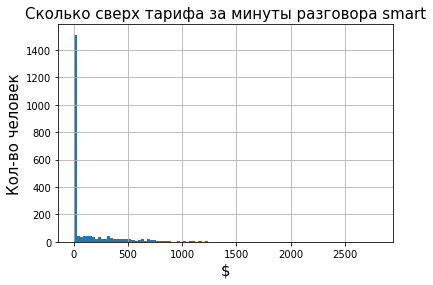

In [20]:
# т.к. у нас выборка
variance_estimate = np.var(users_profil_ultra['calls_sum'], ddof=1)
display('Дисперсия выборки минут разговора ultra ', variance_estimate)  #дисперсия

variance_estimate = np.var(users_profil_smart['calls_sum'], ddof=1)
display('Дисперсия выборки минут разговора smart', variance_estimate)  #дисперсия


standard_deviation = np.std(users_profil_ultra['calls_sum'], ddof=1)
display ('Стандартное отклонение выборки минут разговора ultra', standard_deviation) #Стандартное отклонение

standard_deviation = np.std(users_profil_smart['calls_sum'], ddof=1)
display ('Стандартное отклонение выборки минут разговора smart', standard_deviation) #Стандартное отклонение

display('Среднее минут разговора ultra',users_profil_ultra['calls_sum'].mean())
display('Медиана минут разговора ultra',users_profil_ultra['calls_sum'].median()) 
 
display('Среднее минут разговора smart',users_profil_smart['calls_sum'].mean())
display('Медиана минут разговора smart',users_profil_smart['calls_sum'].median()) 

display('MAX минут разговора ultra',users_profil_ultra['calls_sum'].max()) 
 
display('MAX минут разговора smart',users_profil_smart['calls_sum'].max())

users_profil_ultra['calls_sum'].hist(bins=100, range=(users_profil_ultra['calls_sum'].min(), users_profil_ultra['calls_sum'].max()))
plt.title('Сколько минут разговора ultra', fontsize=15)
plt.xlabel('Минуты', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['calls_sum'].hist(bins=100, range=(users_profil_smart['calls_sum'].min(), users_profil_smart['calls_sum'].max()))
plt.title('Сколько минут разговора smart', fontsize=15)
plt.xlabel('Минуты', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()




users_profil_ultra['deneg_minutes_calls'].hist(bins=100, range=(users_profil_ultra['deneg_minutes_calls'].min(), users_profil_ultra['deneg_minutes_calls'].max()))
plt.title('Сколько сверх тарифа за минуты разговора ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['deneg_minutes_calls'].hist(bins=100, range=(users_profil_smart['deneg_minutes_calls'].min(), users_profil_smart['deneg_minutes_calls'].max()))
plt.title('Сколько сверх тарифа за минуты разговора smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()

**Вывод**

В тарифе ультра Включено 3000 минут разговора. мы видим что очень большой разброс по количеству минут при этом никто не выговаривает 3000. Основная масса клиентов использует до 800 минут. возможно нужно сократить количество минут и перенаправить их в обьем количество интернета. Никто из них не переплачивает за разговоры

В тарифе смарт Включено 500 минут разговора, частенько люди выговаривают сверх - возможна им необходимо количества увеличения минут? до 50 человек переплачивают за дополнительные минуты в разном количестве
 

'Дисперсия выборки сообщений ultra '

2285.4174246558414

'Дисперсия выборки сообщений smart'

796.9552557301129

'Стандартное отклонение выборки сообщений ultra'

47.80603962530092

'Стандартное отклонение выборки сообщений smart'

28.230395954185852

'Среднее сообщений ultra'

49.31338742393509

'Медиана сообщений ultra'

38.0

'Среднее сообщений smart'

33.36905829596412

'Медиана сообщений smart'

28.0

'MAX сообщений ultra'

224.0

'MAX сообщений smart'

143.0

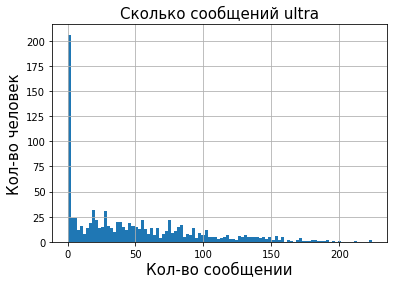

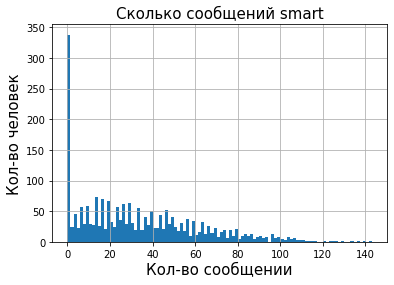

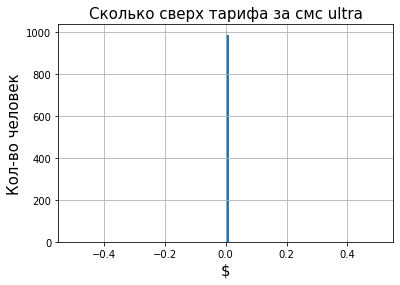

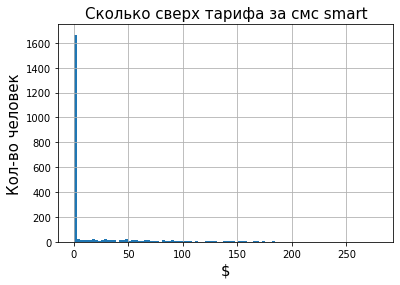

In [21]:
# т.к. у нас выборка
variance_estimate = np.var(users_profil_ultra['messages_count'], ddof=1)
display('Дисперсия выборки сообщений ultra ', variance_estimate)  #дисперсия

variance_estimate = np.var(users_profil_smart['messages_count'], ddof=1)
display('Дисперсия выборки сообщений smart', variance_estimate)  #дисперсия


standard_deviation = np.std(users_profil_ultra['messages_count'], ddof=1)
display ('Стандартное отклонение выборки сообщений ultra', standard_deviation) #Стандартное отклонение

standard_deviation = np.std(users_profil_smart['messages_count'], ddof=1)
display ('Стандартное отклонение выборки сообщений smart', standard_deviation) #Стандартное отклонение

display('Среднее сообщений ultra',users_profil_ultra['messages_count'].mean())
display('Медиана сообщений ultra',users_profil_ultra['messages_count'].median()) 
 
display('Среднее сообщений smart',users_profil_smart['messages_count'].mean())
display('Медиана сообщений smart',users_profil_smart['messages_count'].median()) 

display('MAX сообщений ultra',users_profil_ultra['messages_count'].max()) 
 
display('MAX сообщений smart',users_profil_smart['messages_count'].max())

users_profil_ultra['messages_count'].hist(bins=100, range=(users_profil_ultra['messages_count'].min(), users_profil_ultra['messages_count'].max()))
plt.title('Сколько сообщений ultra', fontsize=15)
plt.xlabel('Кол-во сообщении', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['messages_count'].hist(bins=100, range=(users_profil_smart['messages_count'].min(), users_profil_smart['messages_count'].max()))
plt.title('Сколько сообщений smart', fontsize=15)
plt.xlabel('Кол-во сообщении', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()

users_profil_ultra['deneg_messages'].hist(bins=100, range=(users_profil_ultra['deneg_messages'].min(), users_profil_ultra['deneg_messages'].max()))
plt.title('Сколько сверх тарифа за смс ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['deneg_messages'].hist(bins=100, range=(users_profil_smart['deneg_messages'].min(), users_profil_smart['deneg_messages'].max()))
plt.title('Сколько сверх тарифа за смс smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()

**Вывод**
ультра не используют вою 1000 сообщений им хватает до 200

тогда как смарт активно использует сверх 50 пакетных сообщений 


'Дисперсия выборки GB интернета ultra '

97.37854429011234

'Дисперсия выборки GB интернета smart'

33.133453035506285

'Стандартное отклонение выборки GB интернета ultra'

9.868056763624352

'Стандартное отклонение выборки GB интернета smart'

5.7561665225657155

'Среднее GB интернета ultra'

19.474645030425965

'Медиана GB интернета ultra'

19.0

'Среднее GB интернета smart'

16.32152466367713

'Медиана GB интернета smart'

17.0

'MAX GB интернета ultra'

49.0

'MAX GB интернета smart'

38.0

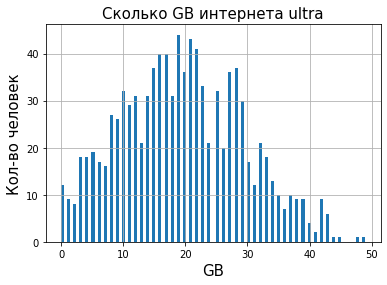

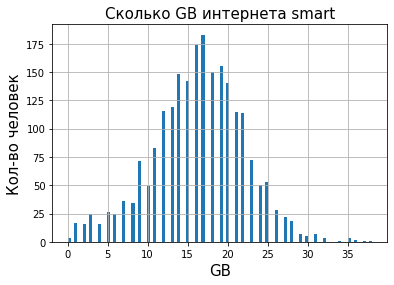

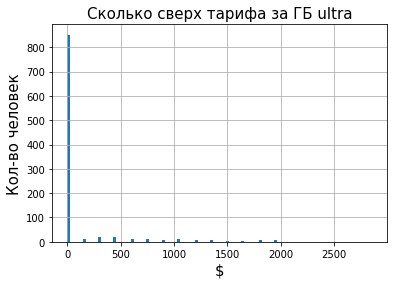

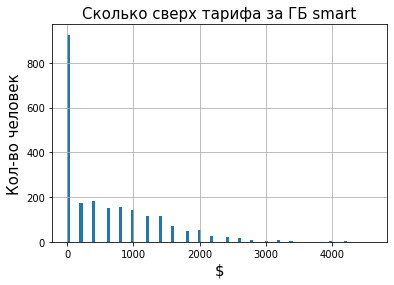

In [22]:
# т.к. у нас выборка
variance_estimate = np.var(users_profil_ultra['internet_sum'], ddof=1)
display('Дисперсия выборки GB интернета ultra ', variance_estimate)  #дисперсия

variance_estimate = np.var(users_profil_smart['internet_sum'], ddof=1)
display('Дисперсия выборки GB интернета smart', variance_estimate)  #дисперсия


standard_deviation = np.std(users_profil_ultra['internet_sum'], ddof=1)
display ('Стандартное отклонение выборки GB интернета ultra', standard_deviation) #Стандартное отклонение

standard_deviation = np.std(users_profil_smart['internet_sum'], ddof=1)
display ('Стандартное отклонение выборки GB интернета smart', standard_deviation) #Стандартное отклонение

display('Среднее GB интернета ultra',users_profil_ultra['internet_sum'].mean())
display('Медиана GB интернета ultra',users_profil_ultra['internet_sum'].median()) 
 
display('Среднее GB интернета smart',users_profil_smart['internet_sum'].mean())
display('Медиана GB интернета smart',users_profil_smart['internet_sum'].median()) 

display('MAX GB интернета ultra',users_profil_ultra['internet_sum'].max()) 
 
display('MAX GB интернета smart',users_profil_smart['internet_sum'].max())

users_profil_ultra['internet_sum'].hist(bins=100, range=(users_profil_ultra['internet_sum'].min(), users_profil_ultra['internet_sum'].max()))
plt.title('Сколько GB интернета ultra', fontsize=15)
plt.xlabel('GB', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['internet_sum'].hist(bins=100, range=(users_profil_smart['internet_sum'].min(), users_profil_smart['internet_sum'].max()))
plt.title('Сколько GB интернета smart', fontsize=15)
plt.xlabel('GB', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()



users_profil_ultra['deneg_internet'].hist(bins=100, range=(users_profil_ultra['deneg_internet'].min(), users_profil_ultra['deneg_internet'].max()))
plt.title('Сколько сверх тарифа за ГБ ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['deneg_internet'].hist(bins=100, range=(users_profil_smart['deneg_internet'].min(), users_profil_smart['deneg_internet'].max()))
plt.title('Сколько сверх тарифа за ГБ smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()



**Вывод**
Оба тарифа используют интернет сверх пакета 

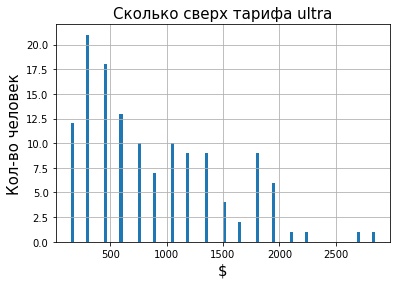

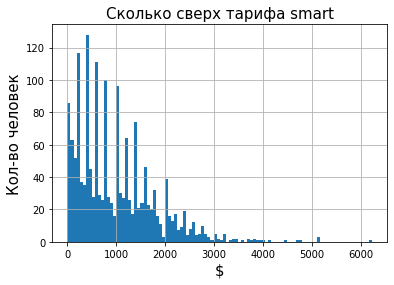

In [23]:
users_profil_ultra_SVERH = users_profil_ultra.query('deneg_sverh_tariff > 0')
users_profil_ultra_SVERH['deneg_sverh_tariff'].hist(bins=100, range=(users_profil_ultra_SVERH['deneg_sverh_tariff'].min(), users_profil_ultra_SVERH['deneg_sverh_tariff'].max()))
plt.title('Сколько сверх тарифа ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart_SVERH = users_profil_smart.query('deneg_sverh_tariff > 0')
users_profil_smart_SVERH['deneg_sverh_tariff'].hist(bins=100, range=(users_profil_smart_SVERH['deneg_sverh_tariff'].min(), users_profil_smart_SVERH['deneg_sverh_tariff'].max()))
plt.title('Сколько сверх тарифа smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()

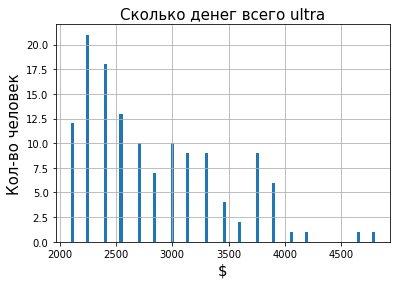

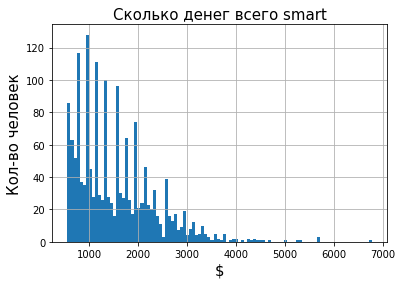

In [24]:
users_profil_ultra_SVERH['deneg_vsego'].hist(bins=100, range=(users_profil_ultra_SVERH['deneg_vsego'].min(), users_profil_ultra_SVERH['deneg_vsego'].max()))
plt.title('Сколько денег всего ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart_SVERH['deneg_vsego'].hist(bins=100, range=(users_profil_smart_SVERH['deneg_vsego'].min(), users_profil_smart_SVERH['deneg_vsego'].max()))
plt.title('Сколько денег всего smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


**Итого**
т.к. многие пользователи тарифа смарт всегда расходуют сверх пакета в большом количестве денег - они выгоднее

'Дисперсия выборки денег ultra '

141387.7148093615

'Дисперсия выборки денег smart'

669730.763894807

'Стандартное отклонение выборки денег ultra'

376.0155778812382

'Стандартное отклонение выборки денег smart'

818.370798534996

'Среднее денег ultra'

2070.030425963489

'Медиана денег ultra'

1950.0

'Среднее денег smart'

1289.6417040358745

'Медиана денег smart'

1021.0

'MAX денег ultra'

4800.0

'MAX денег smart'

6770.0

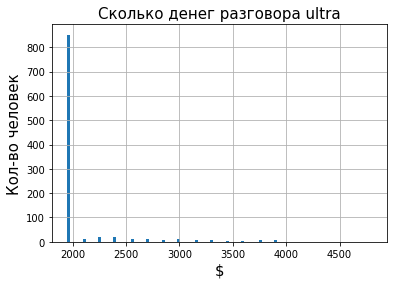

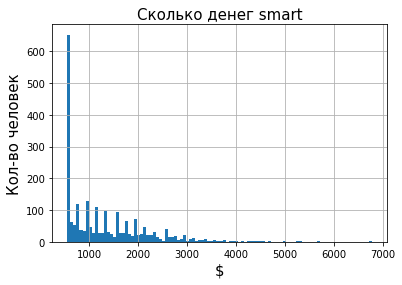

'сумм денег ultra'

2041050.0

'сумм денег smart'

2875901.0

In [25]:


# т.к. у нас выборка
variance_estimate = np.var(users_profil_ultra['deneg_vsego'], ddof=1)
display('Дисперсия выборки денег ultra ', variance_estimate)  #дисперсия

variance_estimate = np.var(users_profil_smart['deneg_vsego'], ddof=1)
display('Дисперсия выборки денег smart', variance_estimate)  #дисперсия


standard_deviation = np.std(users_profil_ultra['deneg_vsego'], ddof=1)
display ('Стандартное отклонение выборки денег ultra', standard_deviation) #Стандартное отклонение

standard_deviation = np.std(users_profil_smart['deneg_vsego'], ddof=1)
display ('Стандартное отклонение выборки денег smart', standard_deviation) #Стандартное отклонение

display('Среднее денег ultra',users_profil_ultra['deneg_vsego'].mean())
display('Медиана денег ultra',users_profil_ultra['deneg_vsego'].median()) 
 
display('Среднее денег smart',users_profil_smart['deneg_vsego'].mean())
display('Медиана денег smart',users_profil_smart['deneg_vsego'].median()) 

display('MAX денег ultra',users_profil_ultra['deneg_vsego'].max()) 
 
display('MAX денег smart',users_profil_smart['deneg_vsego'].max())

users_profil_ultra['deneg_vsego'].hist(bins=100, range=(users_profil_ultra['deneg_vsego'].min(), users_profil_ultra['deneg_vsego'].max()))
plt.title('Сколько денег разговора ultra', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


users_profil_smart['deneg_vsego'].hist(bins=100, range=(users_profil_smart['deneg_vsego'].min(), users_profil_smart['deneg_vsego'].max()))
plt.title('Сколько денег smart', fontsize=15)
plt.xlabel('$', fontsize=15, color='black') 
plt.ylabel('Кол-во человек', fontsize=15, color='black') 
plt.show()


display('сумм денег ultra',users_profil_ultra['deneg_vsego'].sum())
display('сумм денег smart',users_profil_smart['deneg_vsego'].sum()) 

 большой разброс данных от среднего, высокое стандартное отклонение. а дисперсия просто огромна . при этом медиана денег смарта сильно отличаеться от их тарифа по пакету тогда как медиана денег ультра равно стоимости тарифа.
 
 'Среднее денег smart'1234.3196964751958  
 
 'Медиана денег smart' 955.859375
    
    
 'Среднее денег ultra'2040.7979112990358
 
 'Медиана денег ultra'
1950.0

## Шаг Проверка гипотезы
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

***Проверка гипотезы:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются;***

In [26]:
deneg_ultra = users_profil_ultra['deneg_vsego']
deneg_smart = users_profil_smart['deneg_vsego']


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    deneg_ultra, 
    deneg_smart)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.08190955548901e-161
Отвергаем нулевую гипотезу


**Вывод**
Средняя выручка пользователей тарифов «Ультра» и «Смарт» действительно различаются.

***Проверка гипотезы:
        средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.***

In [28]:
users_profil_MSK = users_profil_tariff.query('city == "Москва"')
users_profil_NE_MSK = users_profil_tariff.query('city != "Москва"')
MSK = users_profil_MSK['deneg_vsego']
NE_MSK = users_profil_NE_MSK['deneg_vsego']


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    MSK, 
    NE_MSK)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


***Вывод***
Не отличаются. вот это я удивлена если честно О_о

## Шаг Общий вывод

Пользователи тарифа смарт всегда расходуют сверх пакета - они выгоднее. они платят примерно в 2 раза больше. Тогда как на тарифе ультра есть перерасход только за интернет и то слабо выраженный. по региональному признаку у абонентов нет отличий. тогда как пользователи ультры приносят больше дохода